In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#titanic
titanic_file = 'datasets/titanic/titanic.csv'
td = pd.read_csv(titanic_file)
td.Age = td.Age.fillna(0)
titanic_df = td.copy()
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


      Sex  Survived  PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  \
0  female         0           81      81    81   81     81     81      81   
1  female         1          233     233   233  233    233    233     233   
2    male         0          468     468   468  468    468    468     468   
3    male         1          109     109   109  109    109    109     109   

   Fare  Cabin  Embarked  clean_sex  
0    81      6        81          0  
1   233     91       231          0  
2   468     62       468          1  
3   109     45       109          1  


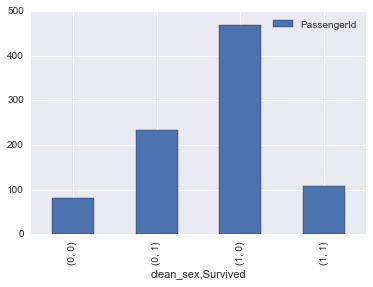

In [218]:
temp = titanic_df.groupby(['Sex','Survived']).count().reset_index()
temp.head()

def clean_sex(x):
        if x == 'female':
            return 0
        else:
            return 1
                
temp['clean_sex'] = temp['Sex'].map(clean_sex)


print temp.head()
temp.plot(x = ['clean_sex','Survived'], y='PassengerId', kind='bar')
plt.show()

plt.show()



In [165]:
td.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_class,fare_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,child,<15
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,child,50-100
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,child,<15


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

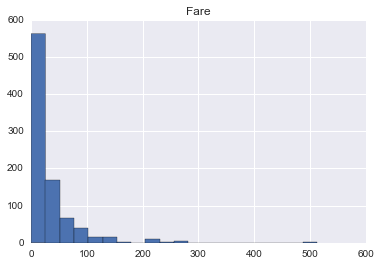

In [198]:
#td.Age.value_counts()
td.hist('Fare', bins = 20)
td.Fare.describe()

In [121]:
#initially difficult to compare
titanic5_metrics = td.groupby(['Sex','Pclass','Age','Embarked','Fare'])
titanic5_metrics[['Survived']].count()



Survived
Sex    Pclass Age  Embarked Fare              
female 1      0.0  C        79.2000          1
                            82.1708          1
                            89.1042          1
                            110.8833         1
                            146.5208         1
                   S        51.8625          1
                            52.0000          1
                            55.0000          1
                            133.6500         1
              2.0  S        151.5500         1
              14.0 S        120.0000         1
              15.0 S        211.3375         1
              16.0 C        57.9792          1
                   S        39.4000          1
                            86.5000          1
              17.0 C        108.9000         1
                   S        57.0000          1
              18.0 C        227.5250         1
                            262.3750         1
                   S        79.6500          1
              19.0 C        91.0792          1
                   S        26.2833          1
                            30.0000          1
              21.0 C        262.3750         1
                   S        77.9583          1
              22.0 C        49.5000          1
                   S        55.0000          1
                            66.6000          1
                            151.5500         1
              23.0 C        113.2750         1
...                                        ...
male   3      40.5 Q        7.7500           1
                   S        14.5000          1
              41.0 S        7.1250           1
                            14.1083          1
              42.0 S        7.5500           1
                            7.6500           1
                            8.4042           1
                            8.6625           1
              43.0 S        6.4500           1
                            8.0500           1
              44.0 S        7.9250           1
                            8.0500           2
                            16.1000          1
              45.0 S        6.9750           1
                            8.0500           1
              45.5 C        7.2250           1
              47.0 S        7.2500           1
                            9.0000           1
              48.0 S        7.8542           1
              49.0 S        0.0000           1
              50.0 S        8.0500           1
              51.0 S        7.0542           1
                            7.7500           1
                            8.0500           1
              55.5 S        8.0500           1
              59.0 S        7.2500           1
              61.0 S        6.2375           1
              65.0 Q        7.7500           1
              70.5 Q        7.7500           1
              74.0 S        7.7750           1

[752 rows x 1 columns]

In [222]:
def create_age_class(x):
    if x == 0:
        return 'none'
    elif x <= 18:
        return 'child'
    elif x > 18 and x <= 40:
        return 'adult'
    else:
        return 'seniors'

titanic_df['age_class'] = titanic_df.Age.map(create_age_class)

def create_fare_class(x):
    if x == 0.0:
        return 'none'
    elif x <= 15:
        return '<15'
    elif x > 15 and x <= 30:
        return '15-30'
    elif x > 30 and x <= 50:
        return '30-50'
    elif x > 50 and x <= 100:
        return '50-100'    
    else:
        return '100+'
    
titanic_df['fare_class'] = titanic_df.Fare.map(create_fare_class)
titanic_df.head(4)

titanic_df.fare_class.value_counts()

# comparing Age vs. Fare vs. pclass, embarked
titanic5_metrics = titanic_df.groupby(['Sex', 'Survived','Pclass','age_class','Embarked','fare_class']).size()
titanic5_metrics




Sex     Survived  Pclass  age_class  Embarked  fare_class
female  0         1       adult      S         100+           1
                          child      S         100+           1
                          seniors    C         15-30          1
                  2       adult      S         15-30          2
                                               <15            2
                          seniors    S         15-30          1
                                               <15            1
                  3       adult      Q         15-30          2
                                               <15            2
                                     S         15-30          4
                                               30-50          2
                                               <15           16
                          child      C         15-30          1
                                               <15            3
                                     Q        

In [221]:
# comparing Age vs. Fare vs. pclass, embarked
titanic5_metrics = titanic_df.groupby(['Sex', 'Survived','Pclass','age_class','Embarked','fare_class']).size()
titanic5_metrics

Sex     Survived  Pclass  age_class  Embarked  fare_class
female  0         1       adult      S         100+           1
                          child      S         100+           1
                          seniors    C         15-30          1
                  2       adult      S         15-30          2
                                               <15            2
                          seniors    S         15-30          1
                                               <15            1
                  3       adult      Q         15-30          2
                                               <15            2
                                     S         15-30          4
                                               30-50          2
                                               <15           16
                          child      C         15-30          1
                                               <15            3
                                     Q        

Survived
Sex    Pclass Age  Embarked Fare              
female 1      0.0  C        79.2000          1
                            82.1708          1
                            89.1042          1
                            110.8833         1
                            146.5208         1
                   S        51.8625          1
                            52.0000          1
                            55.0000          1
                            133.6500         1
              2.0  S        151.5500         1
              14.0 S        120.0000         1
              15.0 S        211.3375         1
              16.0 C        57.9792          1
                   S        39.4000          1
                            86.5000          1
              17.0 C        108.9000         1
                   S        57.0000          1
              18.0 C        227.5250         1
                            262.3750         1
                   S        79.6500          1
              19.0 C        91.0792          1
                   S        26.2833          1
                            30.0000          1
              21.0 C        262.3750         1
                   S        77.9583          1
              22.0 C        49.5000          1
                   S        55.0000          1
                            66.6000          1
                            151.5500         1
              23.0 C        113.2750         1
...                                        ...
male   3      40.5 Q        7.7500           1
                   S        14.5000          1
              41.0 S        7.1250           1
                            14.1083          1
              42.0 S        7.5500           1
                            7.6500           1
                            8.4042           1
                            8.6625           1
              43.0 S        6.4500           1
                            8.0500           1
              44.0 S        7.9250           1
                            8.0500           2
                            16.1000          1
              45.0 S        6.9750           1
                            8.0500           1
              45.5 C        7.2250           1
              47.0 S        7.2500           1
                            9.0000           1
              48.0 S        7.8542           1
              49.0 S        0.0000           1
              50.0 S        8.0500           1
              51.0 S        7.0542           1
                            7.7500           1
                            8.0500           1
              55.5 S        8.0500           1
              59.0 S        7.2500           1
              61.0 S        6.2375           1
              65.0 Q        7.7500           1
              70.5 Q        7.7500           1
              74.0 S        7.7750           1

[752 rows x 1 columns]

In [164]:
#initially difficult to compare
titanic5_metrics = td.groupby(['Pclass','Age','Embarked','Fare']).


Survived
Pclass Age   Embarked Fare              
1      0.00  C        27.7208          2
                      29.7000          1
                      30.6958          1
                      39.6000          1
                      79.2000          1
                      82.1708          1
                      89.1042          1
                      110.8833         1
                      146.5208         1
                      227.5250         1
             S        0.0000           2
                      25.9250          1
                      26.0000          1
                      26.5500          2
                      30.0000          1
                      30.5000          1
                      31.0000          1
                      35.0000          1
                      35.5000          1
                      42.4000          1
                      50.0000          1
                      51.8625          1
                      52.0000          2
                      55.0000          1
                      133.6500         1
                      221.7792         1
       0.92  S        151.5500         1
       2.00  S        151.5500         1
       4.00  S        81.8583          1
       11.00 S        120.0000         1
...                                  ...
3      42.00 S        8.6625           1
       43.00 S        6.4500           1
                      8.0500           1
                      46.9000          1
       44.00 S        7.9250           1
                      8.0500           2
                      16.1000          1
       45.00 C        14.4542          1
             S        6.9750           1
                      7.7500           1
                      8.0500           1
                      27.9000          1
       45.50 C        7.2250           1
       47.00 S        7.2500           1
                      9.0000           1
                      14.5000          1
       48.00 S        7.8542           1
                      34.3750          1
       49.00 S        0.0000           1
       50.00 S        8.0500           1
       51.00 S        7.0542           1
                      7.7500           1
                      8.0500           1
       55.50 S        8.0500           1
       59.00 S        7.2500           1
       61.00 S        6.2375           1
       63.00 S        9.5875           1
       65.00 Q        7.7500           1
       70.50 Q        7.7500           1
       74.00 S        7.7750           1

[713 rows x 1 columns]